In [0]:
!pip install ISR

    100% |████████████████████████████████| 17.3MB 2.2MB/s 
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6


In [0]:
import os
os.chdir("/content/image-super-resolution")

In [0]:
!curl -s https://packagecloud.io/install/repositories/github/git-lfs/script.deb.sh | sudo bash

Detected operating system as Ubuntu/bionic.
Checking for curl...
Detected curl...
Checking for gpg...
Detected gpg...
Running apt-get update... done.
Installing apt-transport-https... done.
Installing /etc/apt/sources.list.d/github_git-lfs.list...done.
Importing packagecloud gpg key... done.
Running apt-get update... done.

The repository is setup! You can now install packages.


In [0]:
!sudo apt-get install git-lfs

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  git-lfs
0 upgraded, 1 newly installed, 0 to remove and 22 not upgraded.
Need to get 5,048 kB of archives.
After this operation, 12.6 MB of additional disk space will be used.
Get:1 https://packagecloud.io/github/git-lfs/ubuntu bionic/main amd64 git-lfs amd64 2.7.1 [5,048 kB]
Fetched 5,048 kB in 1s (8,210 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


In [0]:
!git lfs pull

In [0]:
!python setup.py install

running install
running bdist_egg
running egg_info
creating ISR.egg-info
writing ISR.egg-info/PKG-INFO
writing dependency_links to ISR.egg-info/dependency_links.txt
writing requirements to ISR.egg-info/requires.txt
writing top-level names to ISR.egg-info/top_level.txt
writing manifest file 'ISR.egg-info/SOURCES.txt'
writing manifest file 'ISR.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/ISR
copying ISR/__init__.py -> build/lib/ISR
copying ISR/assistant.py -> build/lib/ISR
creating build/lib/ISR/predict
copying ISR/predict/predictor.py -> build/lib/ISR/predict
copying ISR/predict/__init__.py -> build/lib/ISR/predict
creating build/lib/ISR/utils
copying ISR/utils/metrics.py -> build/lib/ISR/utils
copying ISR/utils/datahandler.py -> build/lib/ISR/utils
copying ISR/utils/image_processing.py -> build/lib/ISR/utils
copying ISR/utils/logger.py -> build/lib/ISR/utils
copyi

In [0]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [0]:
img = Image.open('/content/image-super-resolution/data/input/sample/sandal.jpg')
lr_img = np.array(img)

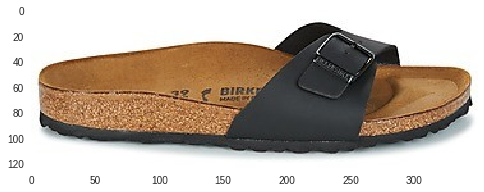

In [0]:
plt.imshow(lr_img)
plt.grid(False)
plt.show()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


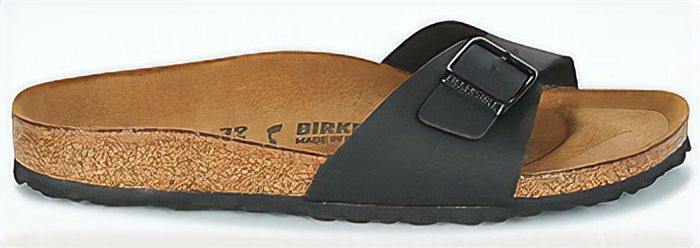

In [0]:
from ISR.models import RDN

rdn = RDN(arch_params={'C':6, 'D':20, 'G':64, 'G0':64, 'x':2})
rdn.model.load_weights('weights/sample_weights/rdn-C6-D20-G64-G064-x2/ArtefactCancelling/rdn-C6-D20-G64-G064-x2_ArtefactCancelling_epoch219.hdf5')

sr_img = rdn.predict(lr_img)
Image.fromarray(sr_img)